In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Global_Superstore_5000.csv")
df.head()

,OrderID,CustomerName,ProductName,Category,SubCategory,Sales,Quantity,Profit,OrderDate,Region
0,1,Customer 1,Binder,Office Supplies,Phones,1537.17,5,-8.31,2023-03-01,South
1,2,Customer 2,Laptop,Technology,Accessories,883.51,7,721.75,2023-08-30,West
2,3,Customer 3,Pen,Office Supplies,Phones,1271.96,4,365.45,2023-01-29,Central
3,4,Customer 4,Printer,Furniture,Binders,1468.81,8,529.13,2023-03-16,South
4,5,Customer 5,Binder,Technology,Tables,1374.67,9,436.04,2023-03-11,East


In [4]:
df.shape        # rows & columns

(5000, 10)

In [5]:
df.info()       # data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       5000 non-null   int64  
 1   CustomerName  5000 non-null   object 
 2   ProductName   5000 non-null   object 
 3   Category      5000 non-null   object 
 4   SubCategory   5000 non-null   object 
 5   Sales         5000 non-null   float64
 6   Quantity      5000 non-null   int64  
 7   Profit        5000 non-null   float64
 8   OrderDate     5000 non-null   object 
 9   Region        5000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 390.8+ KB


In [6]:
df.columns  

Index(['OrderID', 'CustomerName', 'ProductName', 'Category', 'SubCategory',
       'Sales', 'Quantity', 'Profit', 'OrderDate', 'Region'],
      dtype='object')

In [7]:
df.describe() 

,OrderID,Sales,Quantity,Profit
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,1026.691706,4.963400,301.866568
std,1443.520003,566.885208,2.581355,289.666786
min,1.000000,50.310000,1.000000,-199.800000
25%,1250.750000,531.342500,3.000000,52.765000
50%,2500.500000,1015.865000,5.000000,298.060000
75%,3750.250000,1532.092500,7.000000,558.045000
max,5000.000000,1999.620000,9.000000,799.820000


In [8]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [9]:
df.isnull().sum()

OrderID         0
CustomerName    0
ProductName     0
Category        0
SubCategory     0
Sales           0
Quantity        0
Profit          0
OrderDate       0
Region          0
dtype: int64

In [10]:
df.fillna(0, inplace=True)

In [11]:
#Total Sales & Profit
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

print("Total Sales:", total_sales)
print("Total Profit:", total_profit)

Total Sales: 5133458.53
Total Profit: 1509332.8399999999


In [12]:
#Sales by Category
sales_category = df.groupby('Category')['Sales'].sum()
sales_category

Category
Furniture          1694641.28
Office Supplies    1678767.04
Technology         1760050.21
Name: Sales, dtype: float64

In [13]:
#Profit by Region
profit_region = df.groupby('Region')['Profit'].sum()
profit_region

Region
Central    368167.30
East       381384.81
South      377193.28
West       382587.45
Name: Profit, dtype: float64

In [14]:
#Top 10 Products by Sales
top_products = df.groupby('ProductName')['Sales'].sum().sort_values(ascending=False).head(10)
top_products

ProductName
Pen         546430.04
Chair       542259.18
Phone       538952.12
Printer     533859.12
Paper       521701.55
Bookcase    495109.53
Binder      491969.78
Monitor     491354.52
Table       488276.78
Laptop      483545.91
Name: Sales, dtype: float64

In [16]:
#Monthly Sales Trend
monthly_sales = df.groupby(df['OrderDate'].dt.to_period('M'))['Sales'].sum()
monthly_sales

OrderDate
2023-01    504852.76
2023-02    367825.14
2023-03    438274.22
2023-04    439853.90
2023-05    392932.47
2023-06    435043.71
2023-07    407450.11
2023-08    432119.44
2023-09    405756.50
2023-10    418029.97
2023-11    451062.48
2023-12    440257.83
Freq: M, Name: Sales, dtype: float64

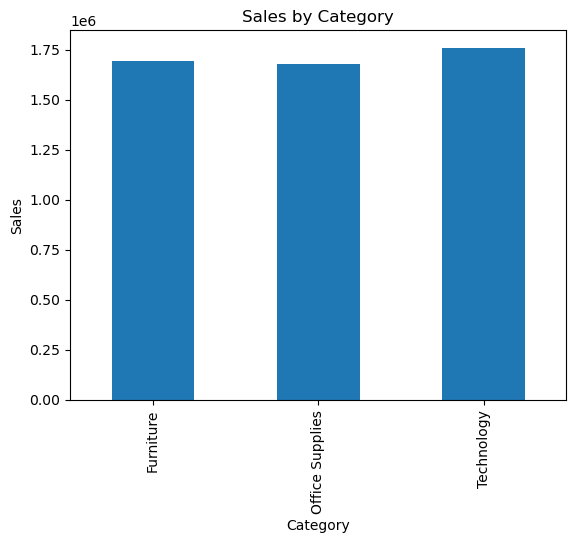

In [18]:
#Sales by Category (Bar Chart)
sales_category.plot(kind='bar')
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

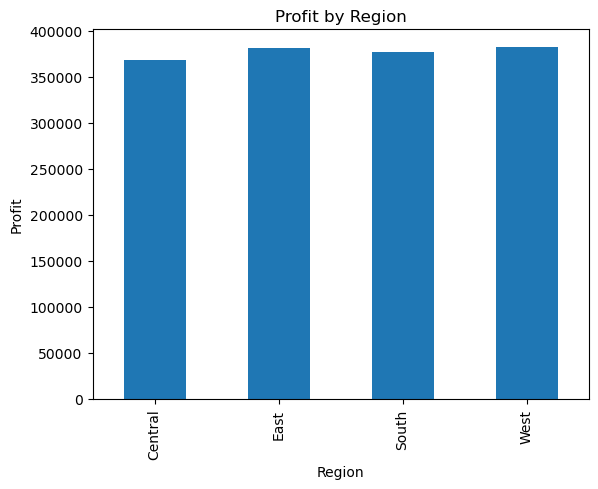

In [19]:
#rofit by Region (Bar Chart)
profit_region.plot(kind='bar')
plt.title("Profit by Region")
plt.xlabel("Region")
plt.ylabel("Profit")
plt.show()

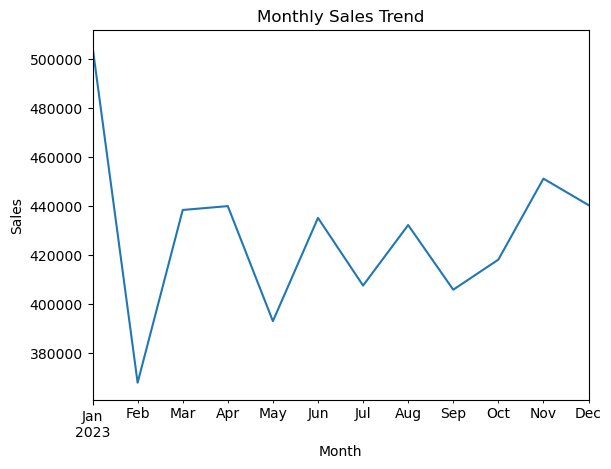

In [20]:
#Monthly Sales Trend (Line Chart)
monthly_sales.plot(kind='line')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

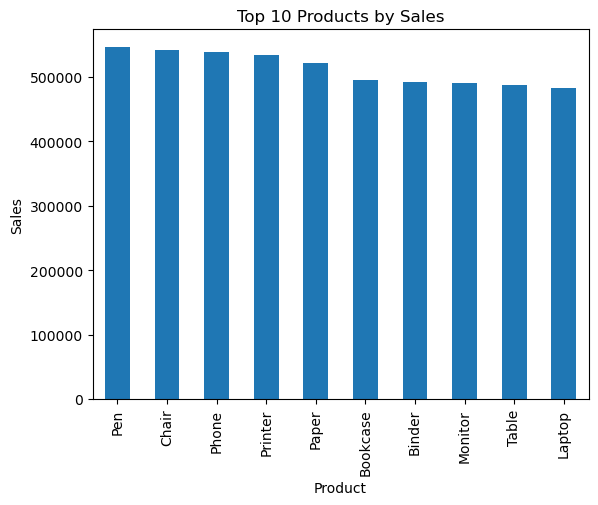

In [21]:
#Top Products (Bar Chart)
top_products.plot(kind='bar')
plt.title("Top 10 Products by Sales")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.show()